In [66]:
import pandas as pd
mushroom_df=pd.read_csv('mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [67]:
# Convert the categorical columns to dummy variables

target = mushroom_df['class']
X = mushroom_df.drop('class' , axis = 1)

import category_encoders as cat_encoder
object_columns = X.select_dtypes(include=['object']).columns
encoder = cat_encoder.BinaryEncoder(cols = object_columns)

# fitting the columns to a data frame
df_mushroom_encoder = encoder.fit_transform(X)
print(df_mushroom_encoder.shape)
df_mushroom_encoder.head()

(8124, 64)


,cap-shape_0,cap-shape_1,cap-shape_2,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,cap-color_3,...,spore-print-color_0,spore-print-color_1,spore-print-color_2,spore-print-color_3,population_0,population_1,population_2,habitat_0,habitat_1,habitat_2
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,1
3,0,0,1,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0


In [68]:
# Split the data into a training and test set, where the SalePrice column is the target.
# Divide the data set into train and test in 70:30 ratio

import sklearn
from sklearn.model_selection import train_test_split

target = mushroom_df['class']
features=df_mushroom_encoder

#splitting
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1)
#printing shapes of testing and training sets :
print("shape of original dataset :", df_mushroom_encoder.shape)
print("shape of input - training set", features_train.shape)
print("shape of output - training set", target_train.shape)
print("shape of input - testing set", features_test.shape)
print("shape of output - testing set", target_test.shape)

shape of original dataset : (8124, 64)
shape of input - training set (5686, 64)
shape of output - training set (5686,)
shape of input - testing set (2438, 64)
shape of output - testing set (2438,)


In [69]:
# Create decision tree classifier object

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

decisiontree = DecisionTreeClassifier(random_state=0,max_depth = 5)

# Train model
model = decisiontree.fit(features_train, target_train)
# Predict model
target_pred=model.predict(features_test)

In [70]:
# Accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Calculate accuracy
print(accuracy_score(target_test, target_pred))

# Confusion Matrix
confusion_matrix = confusion_matrix(target_test, target_pred)
confusion_matrix

0.9954881050041017


array([[1233,    3],
       [   8, 1194]], dtype=int64)

[Text(0.421875, 0.9166666666666666, 'spore-print-color_1 <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2972, 2714]\nclass = p'),
 Text(0.25, 0.75, 'gill-size_0 <= 0.5\ngini = 0.2\nsamples = 2795\nvalue = [2480, 315]\nclass = p'),
 Text(0.1875, 0.5833333333333334, 'stalk-shape_0 <= 0.5\ngini = 0.431\nsamples = 459\nvalue = [144, 315]\nclass = e'),
 Text(0.125, 0.4166666666666667, 'habitat_2 <= 0.5\ngini = 0.292\nsamples = 383\nvalue = [68, 315]\nclass = e'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 221\nvalue = [0, 221]\nclass = e'),
 Text(0.1875, 0.25, 'odor_1 <= 0.5\ngini = 0.487\nsamples = 162\nvalue = [68, 94]\nclass = e'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 94\nvalue = [0, 94]\nclass = e'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 68\nvalue = [68, 0]\nclass = p'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]\nclass = p'),
 Text(0.3125, 0.5833333333333334, 'gini = 0.0\nsamples = 2336\nvalue = [2336, 0]\nclass = p'

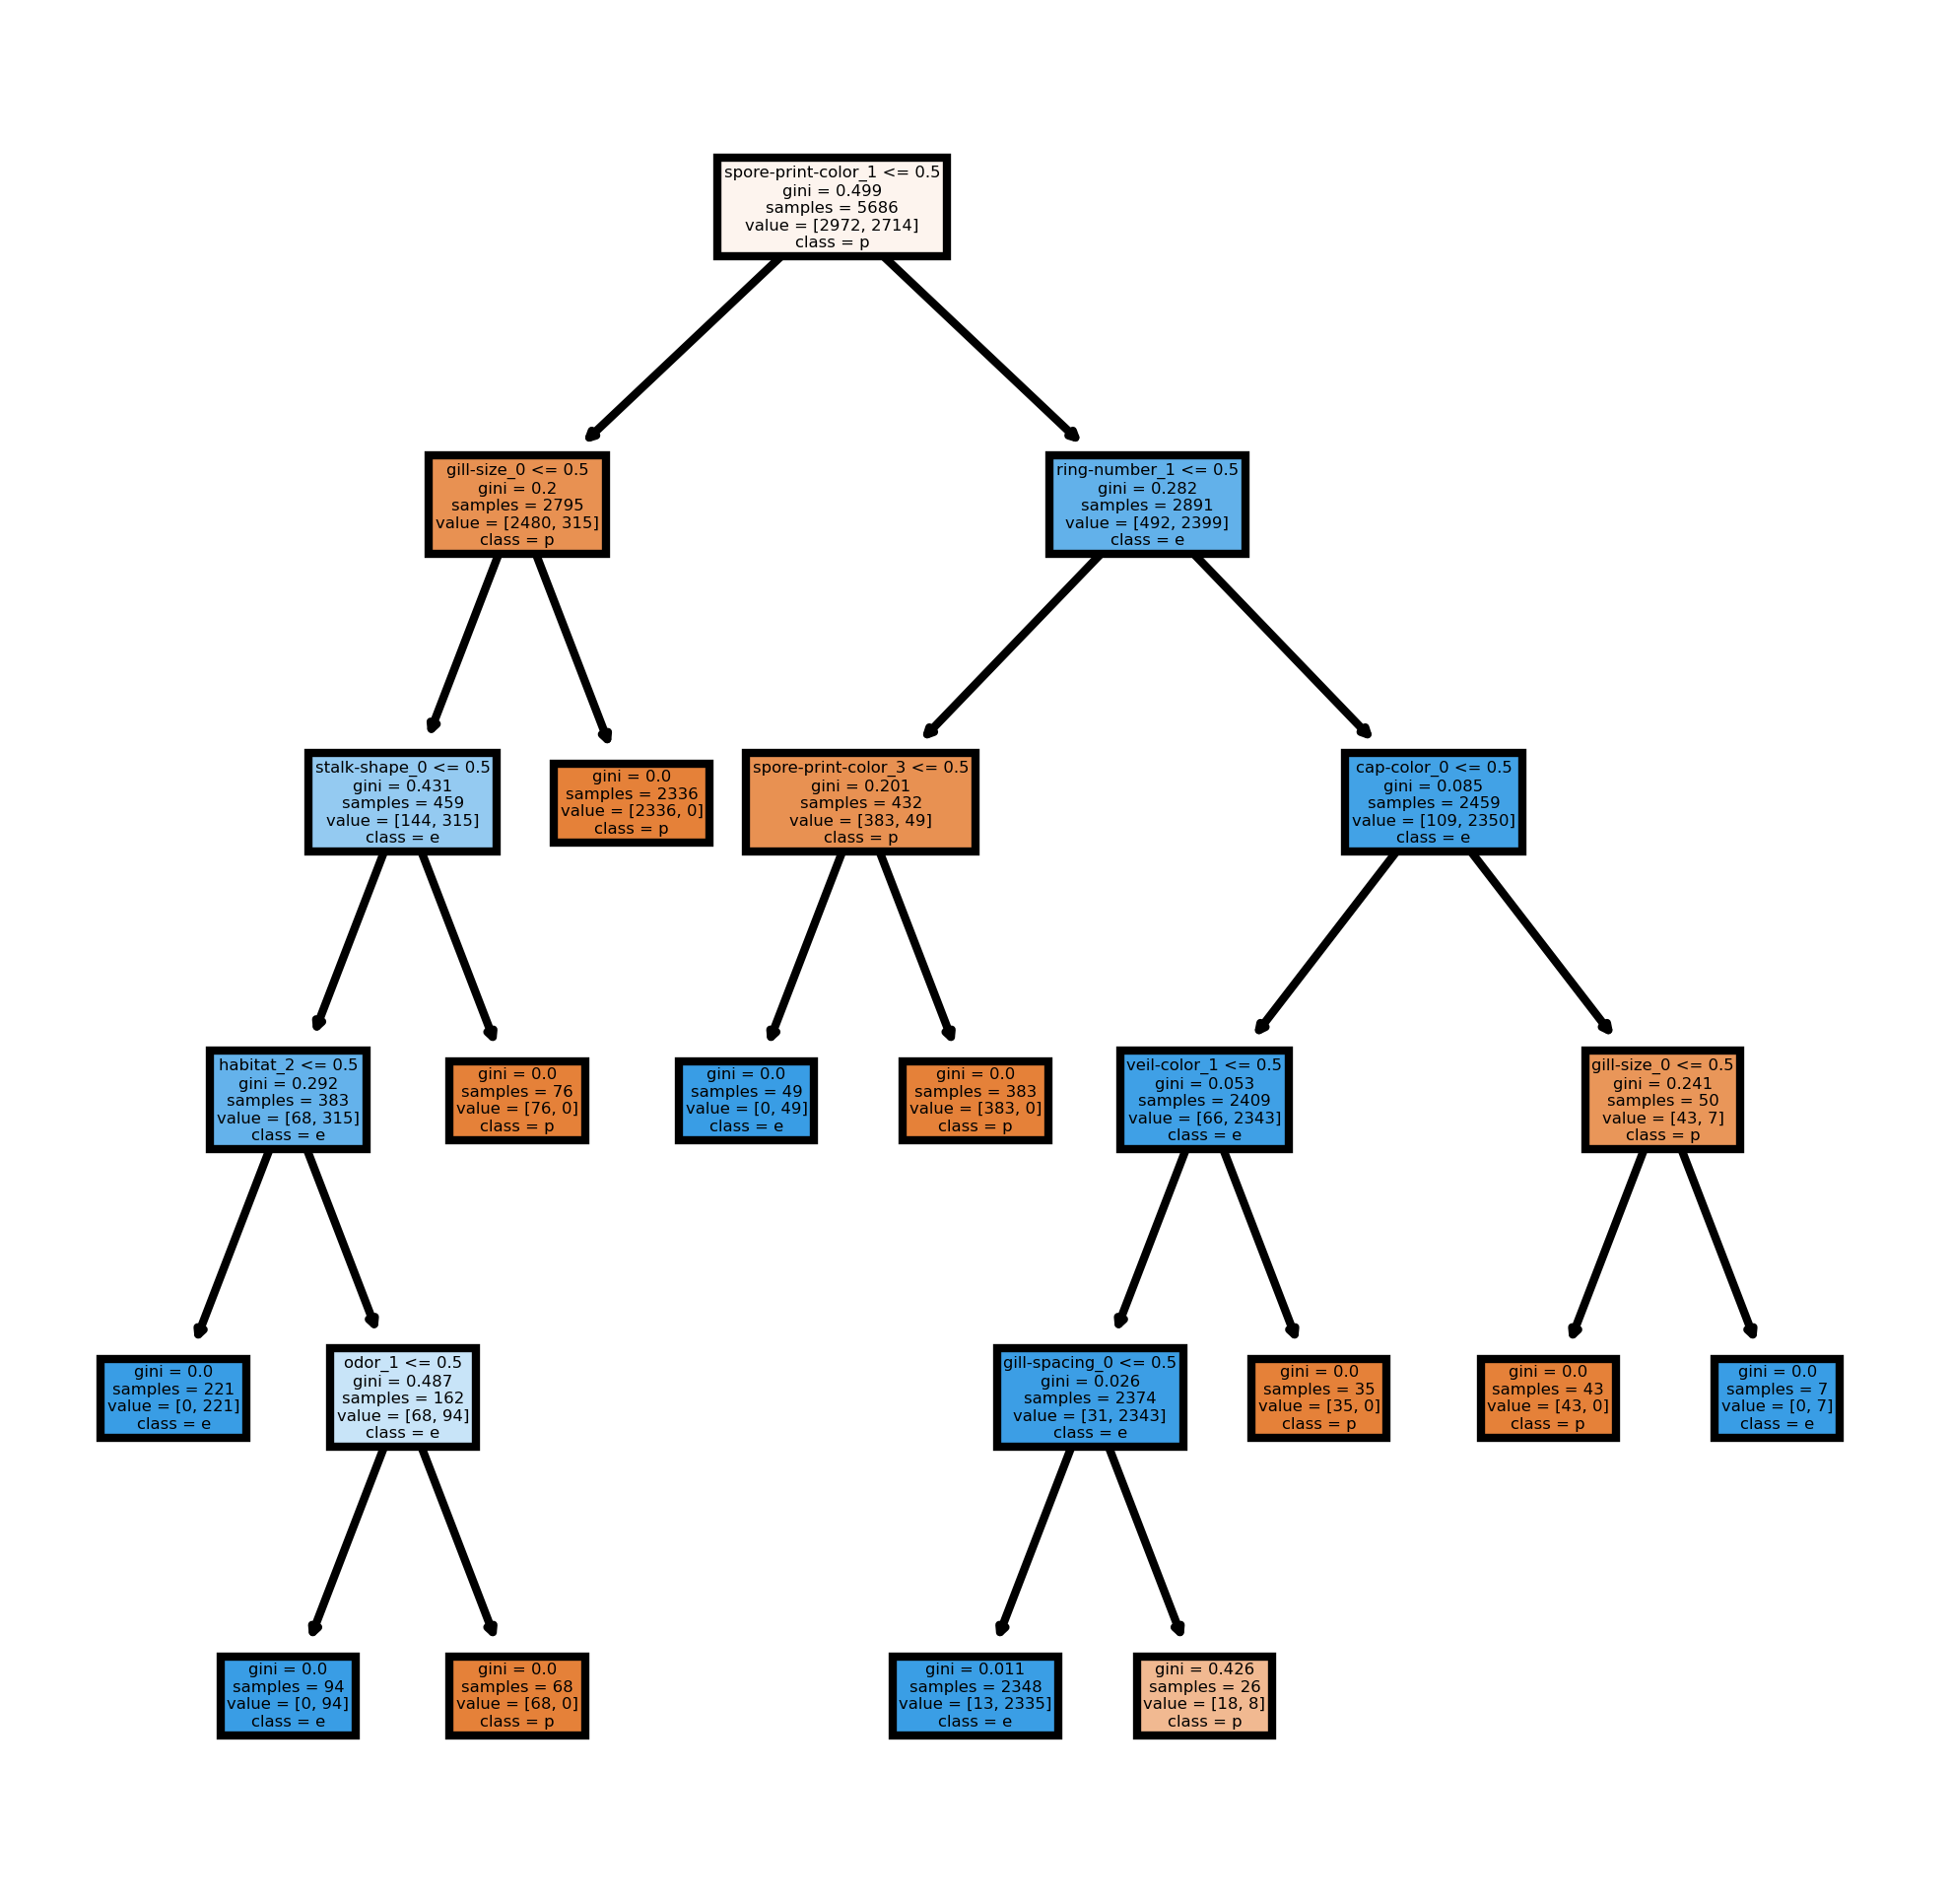

In [71]:
# Load libraries
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import matplotlib.pyplot as plt

fn=features.columns
cn=['p','e']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled=True)

In [72]:
# Load libraries

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# Select five features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features_train, target_train)
indices=chi2_selector.get_support(indices=True)
features_5highest=features_train.columns[indices]
features_5highest

Index(['odor_3', 'gill-size_1', 'gill-color_0', 'stalk-surface-below-ring_0',
       'spore-print-color_1'],
      dtype='object')

In [73]:
# Create decision tree classifier object

# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

decisiontree = DecisionTreeClassifier(random_state=0,max_depth = 5)

# Train model
model = decisiontree.fit(features_train[features_5highest], target_train)
# Predict model
target_pred_5highest=model.predict(features_test[features_5highest])

In [74]:
# Accuracy and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Calculate accuracy
print(accuracy_score(target_test, target_pred_5highest))

# Confusion Matrix
confusion_matrix = confusion_matrix(target_test, target_pred_5highest)
confusion_matrix

0.9622641509433962


array([[1188,   48],
       [  44, 1158]], dtype=int64)

Accuracy seems a little less when we use top 5 features that all the features.